# Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.parse import urlencode
import json
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

# Загрузка данных

In [2]:
public_url = 'https://disk.yandex.ru/d/wHpsXAoAbjh47A' 
api_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
params = {'public_key': public_url}
response = requests.get(api_url, params=params)
response.raise_for_status()
download_url_orders = response.json()['href']
orders = pd.read_csv(download_url_orders)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
public_url = 'https://disk.yandex.ru/d/YYRsaU1Fy5RiSQ' 
api_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
params = {'public_key':public_url}
response = requests.get(api_url, params=params)
download_url_customers = response.json()['href']
customers = pd.read_csv(download_url_customers)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
public_url = 'https://disk.yandex.ru/d/0nhiZwlHU1Rumg' 
api_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
params = {'public_key':public_url}
response = requests.get(api_url, params=params)
download_url_products = response.json()['href']
products = pd.read_csv(download_url_products)
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Анализ данных

Посмотрим на структуру, типы данных и определим, какие именно столбцы будем использовать для рассчета retention

In [6]:
orders.groupby('order_status').order_id.nunique()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

Для анализа retention будем учитывать только статус delivered, так как этот статус означает точное успешное завершение заказа. Соединим в одну таблицу данные о доставленных заказах и id пользователя, который его совершил.

In [7]:
deliver_orders = pd.merge(
    orders[orders['order_status'] == 'delivered'],
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner',
)
deliver_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [8]:
deliver_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
dtype: object

In [9]:
deliver_orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
dtype: int64

За дату действия пользователя возьмем order_purchase_timestamp - дату заказа пользователем, пропусков в этом столбце нет.

In [10]:
# Создаём копию данных, чтобы избежать изменений в исходном DataFrame
deliver_orders_copy = deliver_orders.copy()

In [12]:
# Избавимся от лишних столбцов, оставим только id пользователя и его дату заказа
deliver_orders_copy = deliver_orders_copy[['customer_unique_id', 'order_purchase_timestamp']]
deliver_orders_copy.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [13]:
# Преобразование времени в datetime
deliver_orders_copy['order_purchase_timestamp'] = pd.to_datetime(deliver_orders_copy['order_purchase_timestamp'])

In [15]:
# Создание столбца с месяцем и днем покупки
deliver_orders_copy['order_period'] = deliver_orders_copy['order_purchase_timestamp'] \
                                     .dt.to_period('M')
deliver_orders_copy['order_period_day'] = deliver_orders_copy['order_purchase_timestamp'] \
                                     .dt.to_period('D')

# Присваиваем когорты на основе даты первого действия для каждого пользователя
deliver_orders_copy['cohort'] = deliver_orders_copy \
                               .groupby('customer_unique_id')['order_purchase_timestamp'] \
                               .transform('min') \
                               .dt.to_period('M')

deliver_orders_copy['cohort_day'] = deliver_orders_copy \
                                   .groupby('customer_unique_id')['order_purchase_timestamp'] \
                                   .transform('min') \
                                   .dt.to_period('D')

# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
deliver_orders_copy['period_number_month'] = np.floor(
    (
        deliver_orders_copy['order_period_day']
        - deliver_orders_copy['cohort_day']
    ).apply(attrgetter('n')) / 30)

# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
cohorts = deliver_orders_copy \
         .groupby(['cohort', 'period_number_month'], as_index=False) \
         .agg(n_customer=('customer_unique_id', 'nunique'))

# Создаем сводную таблицу для когортного анализа
cohort_pivot = cohorts.pivot_table(index='cohort', 
                                   columns='period_number_month', 
                                   values='n_customer')

# Найдем размеры когорт (первый столбец в сводной таблице)
cohort_size = cohort_pivot.iloc[:, 0]

# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)


In [16]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


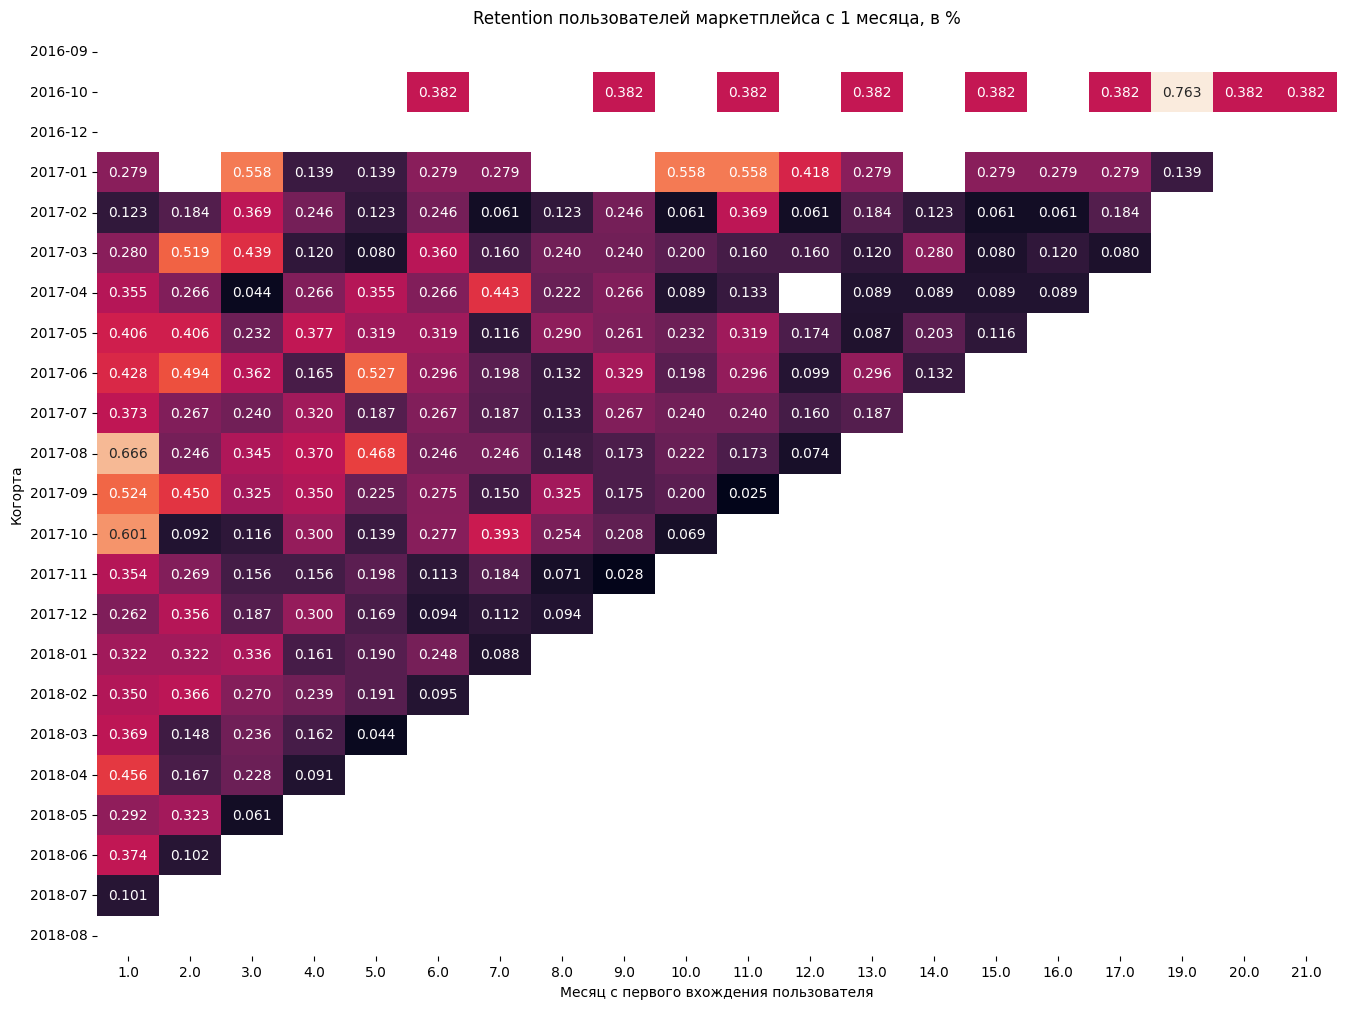

In [19]:
# В построение тепловой карты не учитывается retention 0-го месяца для наглядности
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(retention_matrix.iloc[:, 1:] * 100, fmt = ".3f", annot = True, cbar=False)
plt.title('Retention пользователей маркетплейса с 1 месяца, в %')
plt.xlabel('Месяц с первого вхождения пользователя')
plt.ylabel('Когорта')
plt.show()

Теперь рассчитаем усредненный retention за первый месяц по всем когортам, который будем использовать для дальнейших рассчетов.

In [20]:
average_retention_first_month = retention_matrix[1].median()
print(f'Медианный retention за первый месяц: {average_retention_first_month:.4f}')

Медианный retention за первый месяц: 0.0035


# Пункт 2

Исходя из результатов когортного анализа в продукте сейчас нет product/market fitа.


1. Когортный анализ показывает, что продукт привлекает ежемесячный поток новых клиентов с медианным значением в 4057 клиентов. Это достаточно большой ежемесячный прирост новых клиентов, что указывает на то, что маркетплейс может привлечь новых клиентов и конвертировать их в первый заказ. 

2. Почти все клиенты, сделав первый заказ, не возвращаются в приложение. Лишь 0.35% клиентов (по медиане) остаются активными на первый месяц после первой покупки, а на второй месяц этот показатель значительно снижается практически до нуля. Такой сильный отток указывает на то, что в продукте есть проблемы с удержанием клиентов и презентации им ценности именно нашего маркетплейса.

Для поиска причин низкого retention и отсутствия, как следствие, Product/market fitа нужно проводить дополнительные исследования, но уже сейчас мы можем предполагать различные гипотезы:

- Каналы привлечения привлекают не нашу целевую аудиторию
- Продукт неудобный, пользователю не нравится пользоваться приложением, поэтому он выбирает другие маркетплейсы
- Маленький выбор товаров, нет нужных клиенту
- Цены у конкурентов ниже, чем наши на аналогичные позиции
- Сейчас в продукте нет добавочной ценности, ничем не выделяемся от конкурентов
- Плохой опыт доставки


# Пункт 3

Выделим 5 основных метрик, на которых можно сосредоточиться, чтобы максимизировать прибыль компании.

1. **Выручка (Общий объем продаж)**

Метрика отражает рост общего объема продаж маркетплейса. Она показывает, насколько успешно маркетплейс привлекает покупателей и генерирует доход.

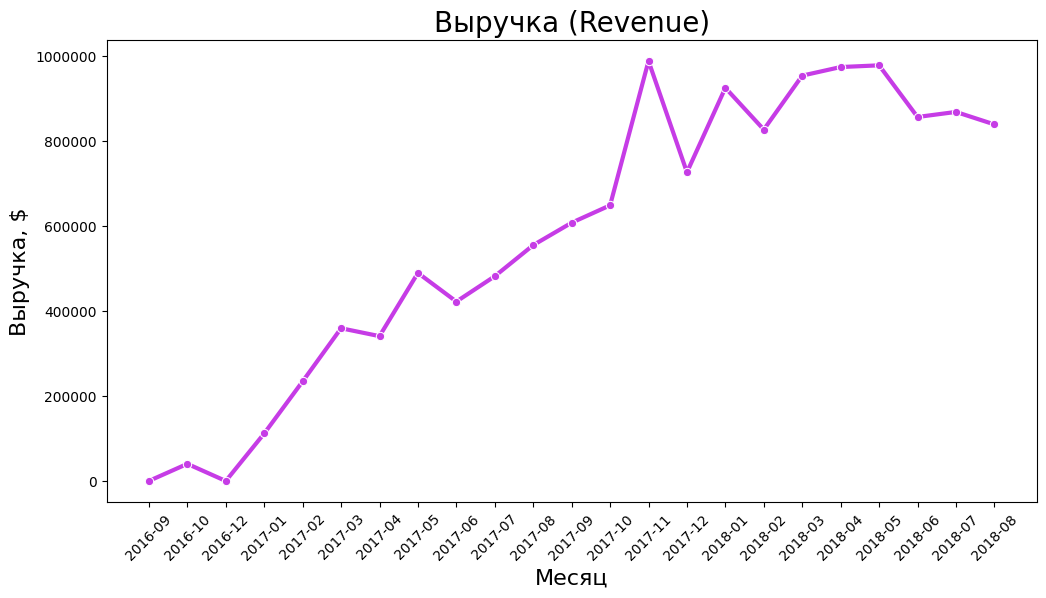

In [21]:
# Считаем помесячную выручку
revenue = pd.merge(
    orders[orders['order_status'] == 'delivered'][
        ['order_purchase_timestamp', 'order_id']
    ],
    products[['order_id', 'product_id', 'price']],
    on='order_id',
    how='left',
)

revenue['order_purchase_timestamp'] = pd.to_datetime(
    revenue['order_purchase_timestamp']
).dt.strftime('%Y-%m')

month_revenue = revenue.groupby(
    'order_purchase_timestamp', as_index=False
).agg(rev=('price', 'sum'))

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=month_revenue,
    x='order_purchase_timestamp',
    y='rev',
    color='#c63ce6',
    linewidth=3,
    marker='o',
)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Выручка (Revenue)', size=20)
plt.xlabel('Месяц', size=16)
plt.ylabel('Выручка, $', size=16)
plt.xticks(rotation=45)

plt.show()


2. **Количество уникальных покупателей в месяц (объем аудитории, которой продукт доставляет ценность)**

Метрика показывает количество уникальных пользователей, которые совершают хотя бы один заказ в продукте в течение месяца. Она поможет посмотреть, сколько клиентов действительно видят ценность в нашем продукте и находят те товары, которые им нужны.

C:\Users\mihay\AppData\Local\Temp\ipykernel_7072\3650098441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_customers['order_purchase_timestamp'] = pd.to_datetime(


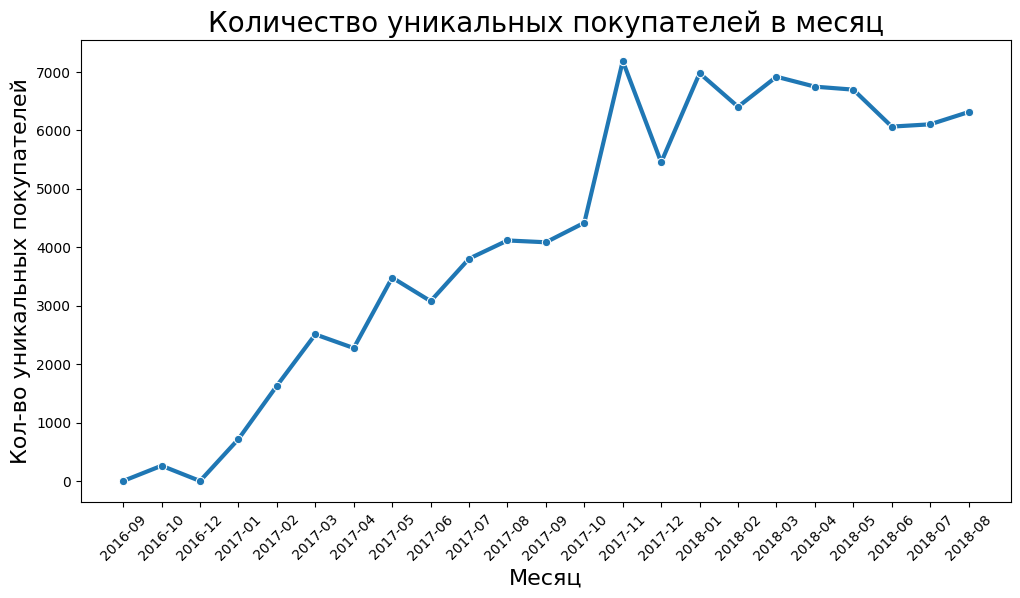

In [22]:
unique_customers = deliver_orders_copy[
    ['customer_unique_id', 'order_purchase_timestamp']
]

unique_customers['order_purchase_timestamp'] = pd.to_datetime(
    unique_customers['order_purchase_timestamp']
).dt.strftime('%Y-%m')

unique_customers = unique_customers.groupby(
    'order_purchase_timestamp', as_index=False
).agg(cnt=('customer_unique_id', 'nunique'))

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=unique_customers,
    x='order_purchase_timestamp',
    y='cnt',
    linewidth=3,
    marker='o',
)
plt.title('Количество уникальных покупателей в месяц', size=20)
plt.xlabel('Месяц', size=16)
plt.ylabel('Кол-во уникальных покупателей', size=16)
plt.xticks(rotation=45)

plt.show()


3. **Конверсия в первую покупку (Заинтересованность новых клиентов в продукте)**

Метрика показывает, какой процент новых пользователь, пришедших в приложение, совершил целевое для нас действие - покупку, то есть сколько людей действительно заинтересовались нашим продуктом.

*Посчитать конверсию в первую покупку на имеющихся данных не представляется возможным*

4. **Retention (Вовлеченность клиента в продолжение использования продукта)**

Коэффициент удержания отражает процент клиентов, которые продолжают совершать покупки в последующие месяцы (или другие временные интервалы). Помогает понять, сколько клиентов остаются в продукте, видят в нем добавочную ценность и выбирают именно нас среди конкурентов.

In [23]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


5. **ARPPU - выручка на одного платящего пользователя (Денежное выражение вовлеченности клиента)**

Показывает выручку, которую маркетплейс получает с одного платящего пользователя

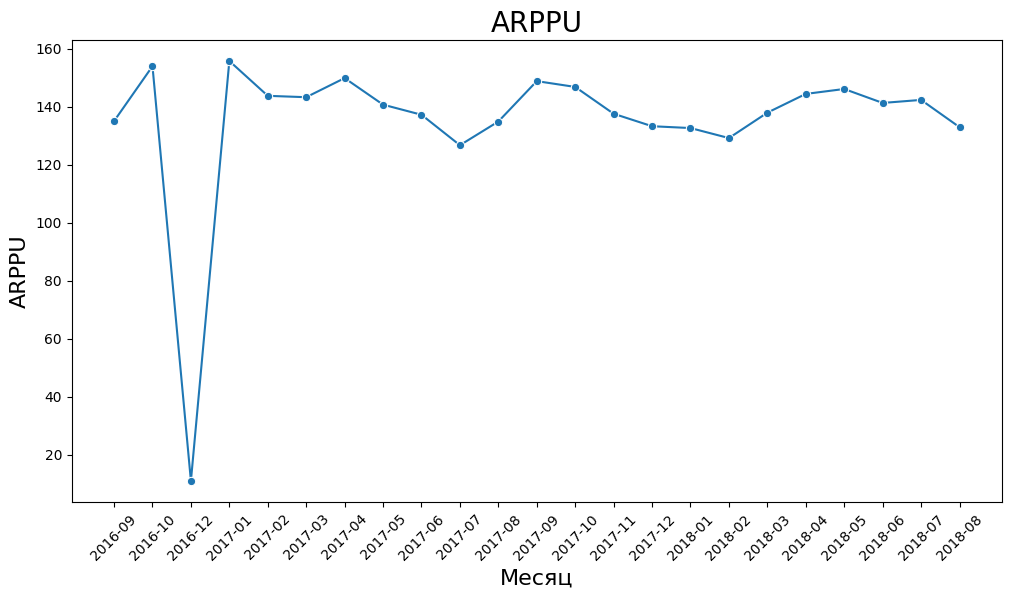

In [24]:
# Рассчет метрики
deliver_orders_copy_2 = deliver_orders.copy()
deliver_orders_copy_2['order_purchase_timestamp'] = pd.to_datetime(
    deliver_orders_copy_2['order_purchase_timestamp']
)

deliver_orders_copy_2['order_purchase_timestamp'] = deliver_orders_copy_2[
    'order_purchase_timestamp'
].dt.to_period('M')

ARPPU = pd.merge(
    deliver_orders_copy_2[
        ['order_id', 'customer_unique_id', 'order_purchase_timestamp']
    ],
    products[['order_id', 'product_id', 'price']],
    on='order_id',
    how='left',
)

ARPPU = (
    ARPPU.groupby('order_purchase_timestamp')
    .agg(
        total_revenue=('price', 'sum'),
        paying_users=('customer_unique_id', 'nunique'),
    )
    .reset_index()
)

ARPPU['ARRPU'] = ARPPU['total_revenue'] / ARPPU['paying_users']

# Переводим формат типа timedelta в строку для построения графика
ARPPU['order_purchase_timestamp'] = ARPPU['order_purchase_timestamp'].astype(
    str
)

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=ARPPU, x='order_purchase_timestamp', y='ARRPU', marker='o')
plt.title('ARPPU', size=20)
plt.xlabel('Месяц', size=16)
plt.ylabel('ARPPU', size=16)
plt.xticks(rotation=45)

plt.show()


# Пункт 4

Учитывая полученные данные по метрикам и когортному анализу, продукт нуждается в изменениях. Были выделены 3 основные гипотезы: 

1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.
2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 
3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.

Мне, как продуктовому аналитику, необходимо приоритезировать гипотезы и выбрать ту, с которой мы будем работать в первую очередь. Для этой цели я воспользуюсь фреймворком ICE. Команда уже выставила баллы для каждой гипотезы по Easy и Confidence, я же займусь рассчетом Impact.

Для рассчета Impact я буду использовать данные с июня 2017 года, так как до этого данных слишком мало и они могут помешать сделать правильные выводы, а также воспользуюсь следующей шкалой перевода метрики в Impact, которую мне предоставил Product owner:

| Impact | 1       | 2       | 3       | 4       | 5       | 6       | 7       | 8       | 9       | 10       |
|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|----------|
| Значение метрики | 0 - 50 | 51 - 150 | 151 - 350 | 351 - 750 | 751 - 1550 | 1551 - 3150 | 3151 - 6350 | 6351 - 12750 | 12751 - 25550 | 25551 - 51150 |


**Гипотеза 1. Если исправим баг в системе процессинга заказов, то клиентам не придется сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится.**

Посчитаем заказы, которые не состоялись по причинам "canceled", "unavailable" за период с июня 2017 года включительно.

In [25]:
orders_copy = orders
cancelled_orders = orders_copy[(orders_copy['order_status'].isin(["unavailable", "canceled"])) 
                               &(orders_copy['order_purchase_timestamp'] >= '2017-06')]

count_cancelled = cancelled_orders.order_id.nunique()
print(f'Количество отмененных заказов: {count_cancelled}')

Количество отмененных заказов: 974


**Гипотеза 2.
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счет повторных заказов.**

Посчитаем количество заказов, доставленных с опозданием. Конверсию в повторный заказ будем считать равной 0.0035.

In [26]:
orders_copy.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [27]:
# Манипуляции с датами
orders_copy['order_purchase_timestamp'] = pd.to_datetime(
    orders_copy['order_purchase_timestamp']
)
orders_copy['order_month'] = orders_copy[
    'order_purchase_timestamp'
].dt.to_period('M')
orders_copy['order_delivered_customer_date'] = pd.to_datetime(
    orders_copy['order_delivered_customer_date']
)
orders_copy['order_estimated_delivery_date'] = pd.to_datetime(
    orders_copy['order_estimated_delivery_date']
)

# Создание столбца с датой покупки
orders_copy['order_delivery_day'] = orders_copy[
    'order_delivered_customer_date'
].dt.to_period('D')
orders_copy['order_estimated_day'] = orders_copy[
    'order_estimated_delivery_date'
].dt.to_period('D')

# Считаем количество задержанных заказов
count_delayed = orders_copy[
    (orders_copy.order_month >= '2017-06')
    & (orders_copy.order_delivery_day > orders_copy.order_estimated_day)
    & (orders_copy.order_status.isin(['delivered']))
].order_id.nunique()

# считаем, сколько было бы повторных заказов из всех задержанных
count_repeat_order = count_delayed * 0.0035

print(f'Возможное количество повторных заказов: {count_repeat_order}')

Возможное количество повторных заказов: 21.3045


**Гипотеза 3.
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при выполнении заказа, вследствие чего  количество заказов увеличится за счет повторных заказов.**

Для расчета Impact по этой гипотезе можно посчитать количество заказов, где клиент сделал только единичный заказ. Конверсию в повторный заказ возьмем равной 0.0035.

In [28]:
# Подсчитываем количество заказов для каждого клиента
deliver_orders['order_purchase_timestamp'] = pd.to_datetime(
    deliver_orders['order_purchase_timestamp']
)
customer_order_counts = (
    deliver_orders.query('order_purchase_timestamp >= "2017-06-01 00:00:01"')
    .groupby('customer_unique_id', as_index=False)
    .agg(orders_count=('order_id', 'nunique'))
)
customer_order_counts = customer_order_counts.groupby(
    'orders_count', as_index=False
).agg(cust_counts=('customer_unique_id', 'count'))

# Определяем количество клиентов, которые сделали только один заказ
single_order_customers_count = int(
    customer_order_counts.query('orders_count == 1').cust_counts
)

C:\Users\mihay\AppData\Local\Temp\ipykernel_7072\3890669995.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  single_order_customers_count = int(


In [30]:
print(f'Возможное количество повторных заказов: {single_order_customers_count*0.0035}')

Возможное количество повторных заказов: 281.95300000000003


Посчитаем общее количество баллов у каждой гипотезы:

| Гипотеза | Impact | Confidence | Ease | ICE |
|----------|--------|------------|------|-----|
| Гипотеза 1 | 5 | 8 | 6 | 240 |
| Гипотеза 2 | 1 | 10 | 4 |  40 |
| Гипотеза 3 | 3 | 5 | 9 |  135 |

Выигрывает первая гипотеза, следовательно именно ее мы будем проверять в первую очередь

# Пункт 5

Для проверки нашей гипотезы о том, что исправление бага в системе процессинга заказов приведет к снижению количества отмен и увеличению количества доставленных заказов, принято решение провести А/В тестирование. Для этого важно определить метрики, которые будут отражать эффективность изменений. Метрики можно разделить на три категории: целевые, прокси и guardrail.

**Целевые метрики**

1. Количество доставленных заказов, среднее количество заказов на пользователя

    Эти метрики взяты в качестве целевых, так как это основные метрики успешности эксперимента, они отражают успешность бизнеса     и напрямую связаны с гипотезой. Метрики обладают достоверностью, чувствительностью и интерпретируемостью.

**Прокси метрики**

2. Конверсия в доставку товара до покупателя, количество добавлений товаров в корзину, количество поисков товара у клиента

    Эти метрики не являются напрямую целевыми, но прямо пропорциональны им и тесно с ними связаны. Эти метрики будут изменяться         быстрее, чем целевые.

**Guardrail метрики**

3. Конверсия в оформление заказа, количество обращений в поддержку

    Показатели, которые сигнализируют о наличии проблем в результате эксперимента. Они могут указывать на негативное влияние           изменений на продукт. 